After doing research, I found out that finer the granularity, the model will capture more granular fluctuations and the pattern. For instance, using daily AQI means that the model will capture the seasonality, but using yearly data will only be able to capture yearly fluctuations.

Therefore, we can either train an LSTM model based on daily or hourly data.

Let’s try training the model based on daily summary data first, and then perhaps 1 hour or 6 hour data.


Objective: Train a PM 2.5 LSTM model based on daily summaries of roughly the past 2 decades for Fresno County.

Step 1: Retrieve the data from the AQS API.

In [1]:
# Decodes of CA and San Joaquin Valley Counties
ca_code = "06"
fresno_code = "019"
kern_code = "029"
kings_code = "031"
madera_code = "039"
merced_code = "047"
san_joaquin_code = "077"
stanislaus_code = "099"
tulare_code = "107"

In [2]:
# Decodes of Pollutants
pm25 = "88101"
pm10 = "85129"
ozone = "44201"
no2 = "42602"



In [3]:
# import the libraries
import requests
import pandas as pd
import time

# show all columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)           # No line wrapping
pd.set_option('display.max_colwidth', None)


In [ ]:
# Initialize an empty DataFrame
fresno_pm25_df = pd.DataFrame()

# Loop over the years from 1980 to 2024
for year in range(1999, 2025):
    url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm25}&bdate={str(year) + '0101'}&edate={str(year) + '1231'}&state={ca_code}&county={fresno_code}"

    try:
        # Make the request
        response = requests.get(url)
        data = response.json()
        if data.get('Header', [])[0]['status'] == "Success":
            # Normalize the JSON data into a flat DataFrame
            current_year_data = pd.json_normalize(data.get('Data', []))

            # Concatenate the current year's data with the main DataFrame
            fresno_pm25_df = pd.concat([fresno_pm25_df, current_year_data], ignore_index=True)
            print(f"Added data for {year}")
        else:
            print(f"No data for {year}")

    except requests.exceptions.RequestException as e:
        # Handle any request-related errors (e.g., network issues)
        print(f"Request failed for {year}: {e}")

    # Wait for a short time before the next request (10 second)
    time.sleep(6)

# After the loop ends, you can process the `df` DataFrame
print("complete")
fresno_pm25_df.to_csv('fresno_pm25.csv', index=False)


Added data for 1999
Added data for 2000
Added data for 2001
Added data for 2002
Added data for 2003
Added data for 2004
Added data for 2005
Added data for 2006
Added data for 2007
Added data for 2008
Added data for 2009
Added data for 2010
Added data for 2011
Added data for 2012
Added data for 2013
Added data for 2014
Added data for 2015
Added data for 2016
Added data for 2017
Added data for 2018
Added data for 2019


Moran's I Test on SJV PM 2.5 2024

Code to get 2024 PM 2.5 Data for the entire SJV

In [ ]:
county_codes = [fresno_code, kern_code, kings_code, madera_code, merced_code, san_joaquin_code, stanislaus_code, tulare_code]

# Initialize an empty DataFrame
pm25_df = pd.DataFrame()

# Fixed year
year = 2024

# Loop over the counties
for county_code in county_codes:
    url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm25}&bdate={str(year) + '0101'}&edate={str(year) + '1231'}&state={ca_code}&county={county_code}"

    try:
        # Make the request
        response = requests.get(url)
        data = response.json()
        if data.get('Header', [])[0]['status'] == "Success":
            # Normalize the JSON data into a flat DataFrame
            county_data = pd.json_normalize(data.get('Data', []))

            # Concatenate this county's data with the main DataFrame
            pm25_df = pd.concat([pm25_df, county_data], ignore_index=True)
            print(f"Added data for county {county_code}")
        else:
            print(f"No data for county {county_code}")

    except requests.exceptions.RequestException as e:
        print(f"Request failed for county {county_code}: {e}")

    # Wait for a short time before the next request (6 seconds)
    time.sleep(6)

# Save the final DataFrame to a CSV file
pm25_df.to_csv('central_valley_pm25_2024.csv', index=False)
print("complete")

Added data for county 019
Added data for county 029
Added data for county 031
Added data for county 039
Added data for county 047
Added data for county 077
Added data for county 099
Added data for county 107
complete


END of Moran's I Test on SJV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/fresno_pm25.csv"
df = pd.read_csv(file_path)
df.head()


<ipython-input-8-606ceccb8a71>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,sample_duration,pollutant_standard,date_local,units_of_measure,event_type,observation_count,observation_percent,validity_indicator,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,6,19,5001,88101,1,36.819449,-119.716433,NAD83,PM2.5 - Local Conditions,7,24 HOUR,PM25 24-hour 2006,1999-01-03,Micrograms/cubic meter (LC),No Events,1,100.0,Y,34.3,34.3,0,98.0,120,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC,Clovis-Villa,"908 N VILLA AVE, CLOVIS",California,Fresno,Clovis,23420,"Fresno, CA",2024-05-19
1,6,19,5001,88101,1,36.819449,-119.716433,NAD83,PM2.5 - Local Conditions,7,24 HOUR,PM25 Annual 2006,1999-01-03,Micrograms/cubic meter (LC),No Events,1,100.0,Y,34.3,34.3,0,98.0,120,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC,Clovis-Villa,"908 N VILLA AVE, CLOVIS",California,Fresno,Clovis,23420,"Fresno, CA",2024-05-19
2,6,19,5001,88101,1,36.819449,-119.716433,NAD83,PM2.5 - Local Conditions,7,24 HOUR,PM25 24-hour 2012,1999-01-03,Micrograms/cubic meter (LC),No Events,1,100.0,Y,34.3,34.3,0,98.0,120,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC,Clovis-Villa,"908 N VILLA AVE, CLOVIS",California,Fresno,Clovis,23420,"Fresno, CA",2024-05-19
3,6,19,5001,88101,1,36.819449,-119.716433,NAD83,PM2.5 - Local Conditions,7,24 HOUR,PM25 Annual 2012,1999-01-03,Micrograms/cubic meter (LC),No Events,1,100.0,Y,34.3,34.3,0,98.0,120,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC,Clovis-Villa,"908 N VILLA AVE, CLOVIS",California,Fresno,Clovis,23420,"Fresno, CA",2024-05-19
4,6,19,5001,88101,1,36.819449,-119.716433,NAD83,PM2.5 - Local Conditions,7,24 HOUR,PM25 24-hour 1997,1999-01-03,Micrograms/cubic meter (LC),No Events,1,100.0,Y,34.3,34.3,0,98.0,120,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC,Clovis-Villa,"908 N VILLA AVE, CLOVIS",California,Fresno,Clovis,23420,"Fresno, CA",2024-05-19


Step 2: Preprocessing Pipeline (To Prepare for the LSTM Model Training)

Step 2.1: Handle Missing Values: make sure that the daily data have consistent daily intervals.

In [7]:
# Retrieve the AQI value for each unique combination of Date and Monitor location
univariate_df = fresno_pm25_df.groupby(['date_local', 'site_number'])['aqi'].mean().reset_index()


In [8]:
univariate_df

,date_local,site_number,aqi
0,1999-01-03,0008,119.0
1,1999-01-03,5001,98.0
2,1999-01-06,0008,115.0
3,1999-01-06,5001,91.0
4,1999-01-09,0008,159.0
...,...,...,...
29319,2024-12-31,0500,18.0
29320,2024-12-31,2009,3.0
29321,2024-12-31,2016,85.0
29322,2024-12-31,5001,62.0


In [9]:
# Get the average AQI value of all monitors for each day
univariate_df = univariate_df.groupby("date_local")['aqi'].mean().reset_index()

In [10]:
univariate_df

,date_local,aqi
0,1999-01-03,108.500000
1,1999-01-06,103.000000
2,1999-01-09,159.000000
3,1999-01-12,165.000000
4,1999-01-15,203.000000
...,...,...
9109,2024-12-27,44.833333
9110,2024-12-28,47.666667
9111,2024-12-29,49.083333
9112,2024-12-30,37.166667


In [11]:
daily_index = pd.date_range(start="1999-01-01", end="2024-12-31", freq="D")

In [12]:
univariate_df["date_local"] = pd.to_datetime(univariate_df["date_local"])

In [13]:
univariate_df = univariate_df.set_index("date_local")

In [14]:
univariate_df = univariate_df.reindex(daily_index)

In [15]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
univariate_df["aqi"] = univariate_df["aqi"].interpolate(method="time")

In [16]:
# Fill start and end values
univariate_df['aqi'] = univariate_df['aqi'].ffill().bfill()


In [17]:
univariate_df

,aqi
1999-01-01,108.500000
1999-01-02,108.500000
1999-01-03,108.500000
1999-01-04,106.666667
1999-01-05,104.833333
...,...
2024-12-27,44.833333
2024-12-28,47.666667
2024-12-29,49.083333
2024-12-30,37.166667


END of Handling missing values

Code to See How the data was BEFORE handling missing values

In [ ]:
# Separating the year-month-day formatted column into year, month, and day columns
univariate_df[["year", "month", "day"]] = univariate_df["date_local"].str.split("-", expand=True)

In [ ]:
unique_days_per_month = univariate_df.groupby(['year', 'month'])['day'].unique().reset_index()

# Rename the column for clarity
unique_days_per_month.rename(columns={'day': 'unique_days'}, inplace=True)

unique_days_per_month

,year,month,unique_days
0,1999,01,"[03, 06, 09, 12, 15, 18, 21, 24, 27, 30]"
1,1999,02,"[02, 05, 08, 11, 14, 17, 20, 23, 26]"
2,1999,03,"[01, 04, 07, 10, 13, 16, 19, 22, 25, 28, 31]"
3,1999,04,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 30]"
4,1999,05,"[03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31]"
...,...,...,...
307,2024,08,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
308,2024,09,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]"
309,2024,10,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
310,2024,11,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]"


In [ ]:
# Checking how much data is available without interpolating
test_df = df.groupby(['date_local', 'site_number'])['aqi'].mean().reset_index()
test_df = test_df.groupby("date_local")['aqi'].mean().reset_index()

In [ ]:
test_df

,date_local,aqi
0,1999-01-03,108.500000
1,1999-01-06,103.000000
2,1999-01-09,159.000000
3,1999-01-12,165.000000
4,1999-01-15,203.000000
...,...,...
9109,2024-12-27,44.833333
9110,2024-12-28,47.666667
9111,2024-12-29,49.083333
9112,2024-12-30,37.166667


In [ ]:
# Get the average AQI value of all monitors for each day
univariate_df = univariate_df.groupby("date_local")['aqi'].mean().reset_index()

In [ ]:
# Convert the date_local column's type into datetime type
univariate_df["date_local"] = pd.to_datetime(univariate_df["date_local"])

In [ ]:
# Set the index to date_local
univariate_df.set_index("date_local", inplace=True)

In [ ]:
# Reindex the df to include every single day; the date_range function is aware of how many days years in the past had
daily_index = pd.date_range(start="1999-01-01", end="2024-12-31", freq="D")

In [ ]:
univariate_df.reset_index(daily_index)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
univariate_df

,aqi
date_local,
1999-01-03,108.500000
1999-01-06,103.000000
1999-01-09,159.000000
1999-01-12,165.000000
1999-01-15,203.000000
...,...
2024-12-27,44.833333
2024-12-28,47.666667
2024-12-29,49.083333


In [ ]:
# Sort the date in ascending order
univariate_df = univariate_df.sort_index()

In [ ]:
aqi_data = univariate_df["aqi"].values.reshape(-1, 1)

In [ ]:
aqi_data

array([[108.5       ],
       [108.5       ],
       [108.5       ],
       ...,
       [ 49.08333333],
       [ 37.16666667],
       [ 56.33333333]])

Step 3: Get Rid of Outliers.

There exists a clear outlier in 2020. Need to get rid of it. Since this is a rare event and is not usual of the AQI, we should remove it and replace it with some other value (e.g. interpolation).

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

Step 1. Visualize BEFORE outlier removal

In [18]:
univariate_df['date_local'] = pd.to_datetime(univariate_df.index)


In [19]:
univariate_df['year'] = univariate_df['date_local'].dt.year

In [20]:
univariate_df['dayofyear'] = univariate_df['date_local'].dt.dayofyear

In [21]:
# Pivot to Year x DayOfYear matrix
pivot_df = univariate_df.pivot(index='year', columns='dayofyear', values='aqi')

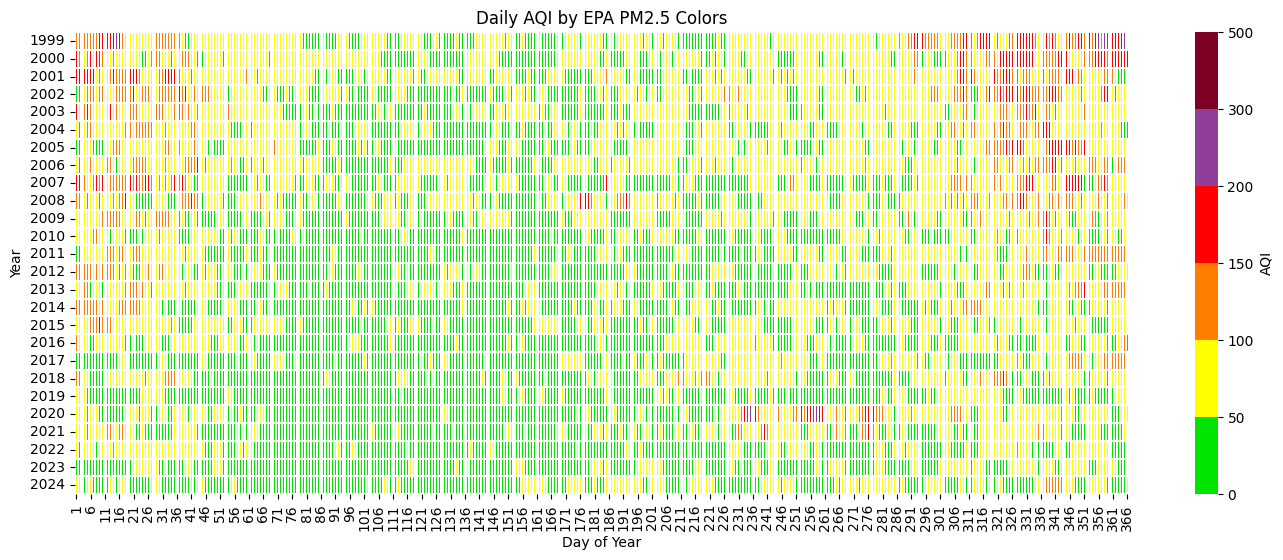

In [28]:
# @title Default title text
# Define EPA PM2.5 AQI colors
aqi_colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']

# Define AQI breakpoints
bounds = [0, 50, 100, 150, 200, 300, 500]

# Create custom colormap and norm
cmap = ListedColormap(aqi_colors)
norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap
plt.figure(figsize=(17, 6))
sns.heatmap(pivot_df, cmap=cmap, norm=norm, cbar_kws={'label': 'AQI'}, linewidths=0.05)

# Customize plot
plt.title('Daily AQI by EPA PM2.5 Colors')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.show()

Step 2: Smooth the outliers

Since we want to smooth only the outliers, we can use the IQR-Based Outlier Smoothing; this ensures that other non-outlier data points are saved as is, which is very important. Only outlier points are replaced with a local rolling mean. Result:
→ Clean, natural-looking AQI time series
→ Real trends preserved
→ Spikes handled locally



In [ ]:
q1 = univariate_df['aqi'].quantile(0.25)
q3 = univariate_df['aqi'].quantile(0.75)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Rolling mean with min_periods=1
rolling_mean = univariate_df['aqi'].rolling(window=7, center=True, min_periods=1).mean()

# Replace outliers with rolling mean
univariate_df['aqi_smoothed'] = np.where(
    (univariate_df['aqi'] < lower_bound) | (univariate_df['aqi'] > upper_bound),
    rolling_mean,
    univariate_df['aqi']
)

Step 3: Visualize again to check if outliers are removed

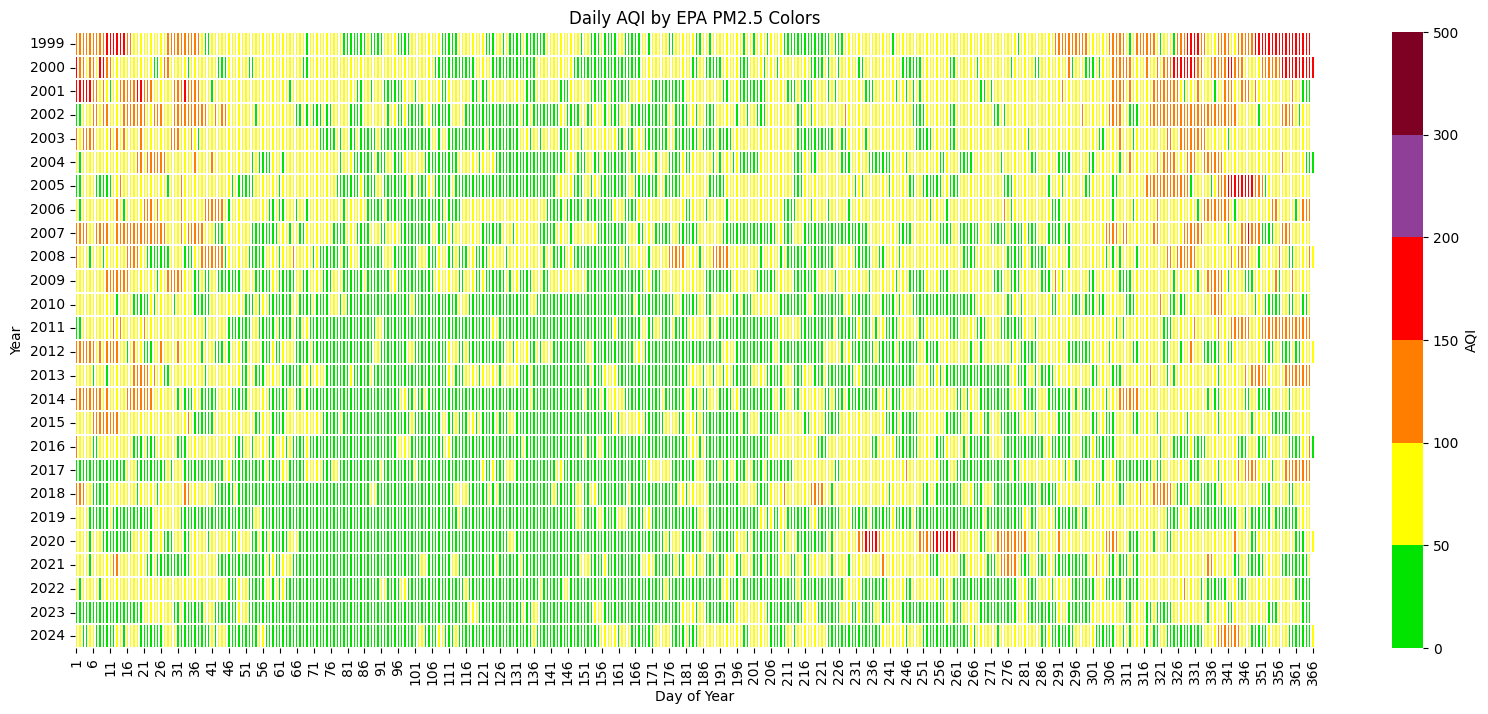

In [ ]:
pivot_df = univariate_df.pivot(index='year', columns='dayofyear', values='aqi_smoothed')
# Define EPA PM2.5 AQI colors
aqi_colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']

# Define AQI breakpoints
bounds = [0, 50, 100, 150, 200, 300, 500]

# Create custom colormap and norm
cmap = ListedColormap(aqi_colors)
norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_df, cmap=cmap, norm=norm, cbar_kws={'label': 'AQI'}, linewidths=0.05)

# Customize plot
plt.title('Daily AQI by EPA PM2.5 Colors')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.show()

As we can see, outliers were smoothed quite well. But some outliers are still not smoothed enough. Especially, the 2020 case.

Step 4: Try capping and rolling window.(simple capping + rolling mean is great for small, scattered outliers, but not for persistent or sudden structural anomalies, especially those lasting days or weeks.)

In [ ]:
lower, upper = np.percentile(univariate_df['aqi'], [5, 95])
univariate_df['aqi_capped'] = univariate_df['aqi'].clip(lower, upper)

In [ ]:
univariate_df['aqi_smoothed'] = univariate_df['aqi_capped'].rolling(window=3, center=True).mean()


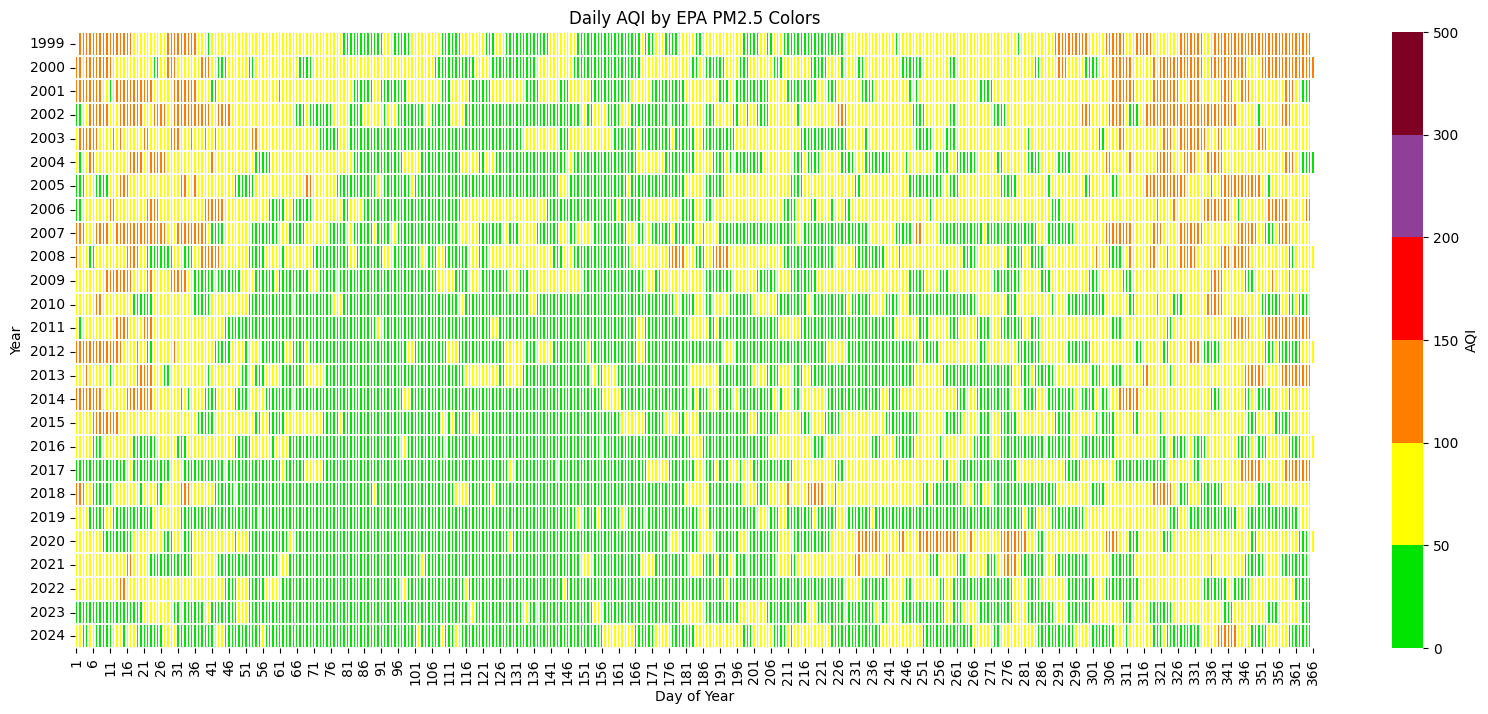

In [ ]:
pivot_df = univariate_df.pivot(index='year', columns='dayofyear', values='aqi_smoothed')
# Define EPA PM2.5 AQI colors
aqi_colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']

# Define AQI breakpoints
bounds = [0, 50, 100, 150, 200, 300, 500]

# Create custom colormap and norm
cmap = ListedColormap(aqi_colors)
norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_df, cmap=cmap, norm=norm, cbar_kws={'label': 'AQI'}, linewidths=0.05)

# Customize plot
plt.title('Daily AQI by EPA PM2.5 Colors')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.show()

Step 5: Try Isolation Forest, which is excellent for detecting both sudden spikes and long-lasting anomalies in time-series

In [29]:
from sklearn.ensemble import IsolationForest


In [30]:
# Reshape AQI values to 2D array
X = univariate_df['aqi'].values.reshape(-1, 1)

# Initialize model
model = IsolationForest(contamination=0.07, random_state=42)

# Fit the model
model.fit(X)

# Predict anomalies (-1 for outliers, 1 for inliers)
univariate_df['outlier_flag'] = model.predict(X)

In [31]:
def get_previous_year_aqi(x):
    match = univariate_df.loc[
        (univariate_df.index.month == x.month) &
        (univariate_df.index.day == x.day) &
        (univariate_df.index.year == x.year - 1), 'aqi']

    # If there's at least one match, take the mean (or first value)
    if not match.empty:
        return match.mean()  # or match.iloc[0]
    else:
        return np.nan

univariate_df['previous_year_aqi'] = univariate_df.index.map(get_previous_year_aqi)

In [32]:
# Replace outliers with previous year AQI values
univariate_df['aqi_cleaned'] = univariate_df['aqi']
univariate_df.loc[univariate_df['outlier_flag'] == -1, 'aqi_cleaned'] = univariate_df['previous_year_aqi']

# Fill remaining NaNs (where no previous year data exists)
univariate_df['aqi_cleaned'].fillna(univariate_df['aqi'].median(), inplace=True)

<ipython-input-32-03855733769e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  univariate_df['aqi_cleaned'].fillna(univariate_df['aqi'].median(), inplace=True)


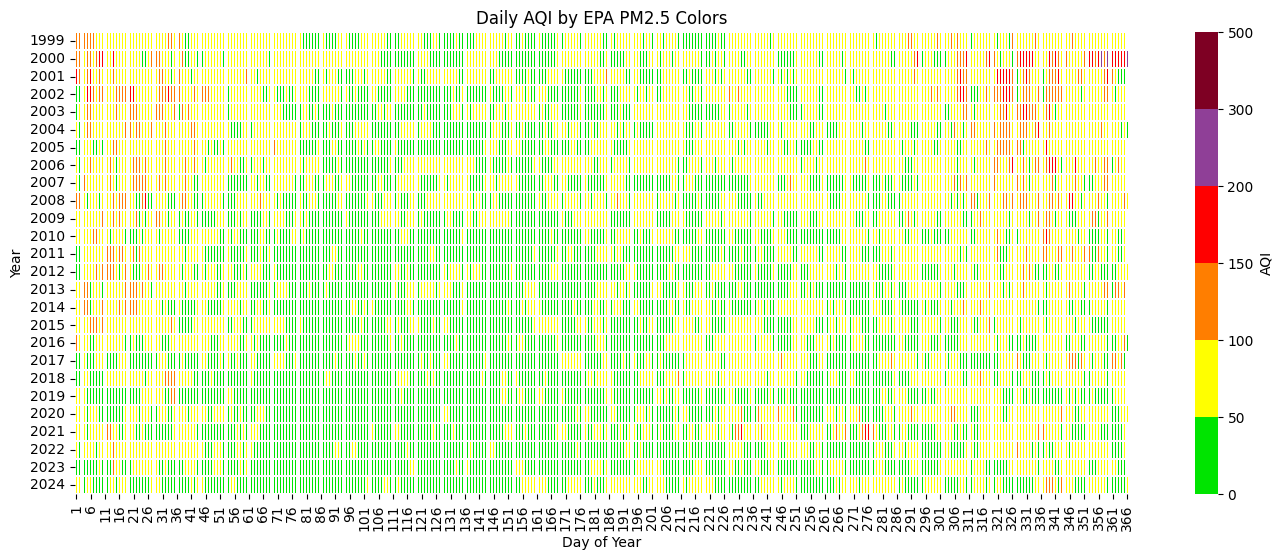

In [36]:
pivot_df = univariate_df.pivot(index='year', columns='dayofyear', values='aqi_cleaned')
# Define EPA PM2.5 AQI colors
aqi_colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']

# Define AQI breakpoints
bounds = [0, 50, 100, 150, 200, 300, 500]

# Create custom colormap and norm
cmap = ListedColormap(aqi_colors)
norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap
plt.figure(figsize=(17, 6))
sns.heatmap(pivot_df, cmap=cmap, norm=norm, cbar_kws={'label': 'AQI'}, linewidths=0.05)

# Customize plot
plt.title('Daily AQI by EPA PM2.5 Colors')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.show()

Step 6: Check if the data meets the assumptions for LSTM

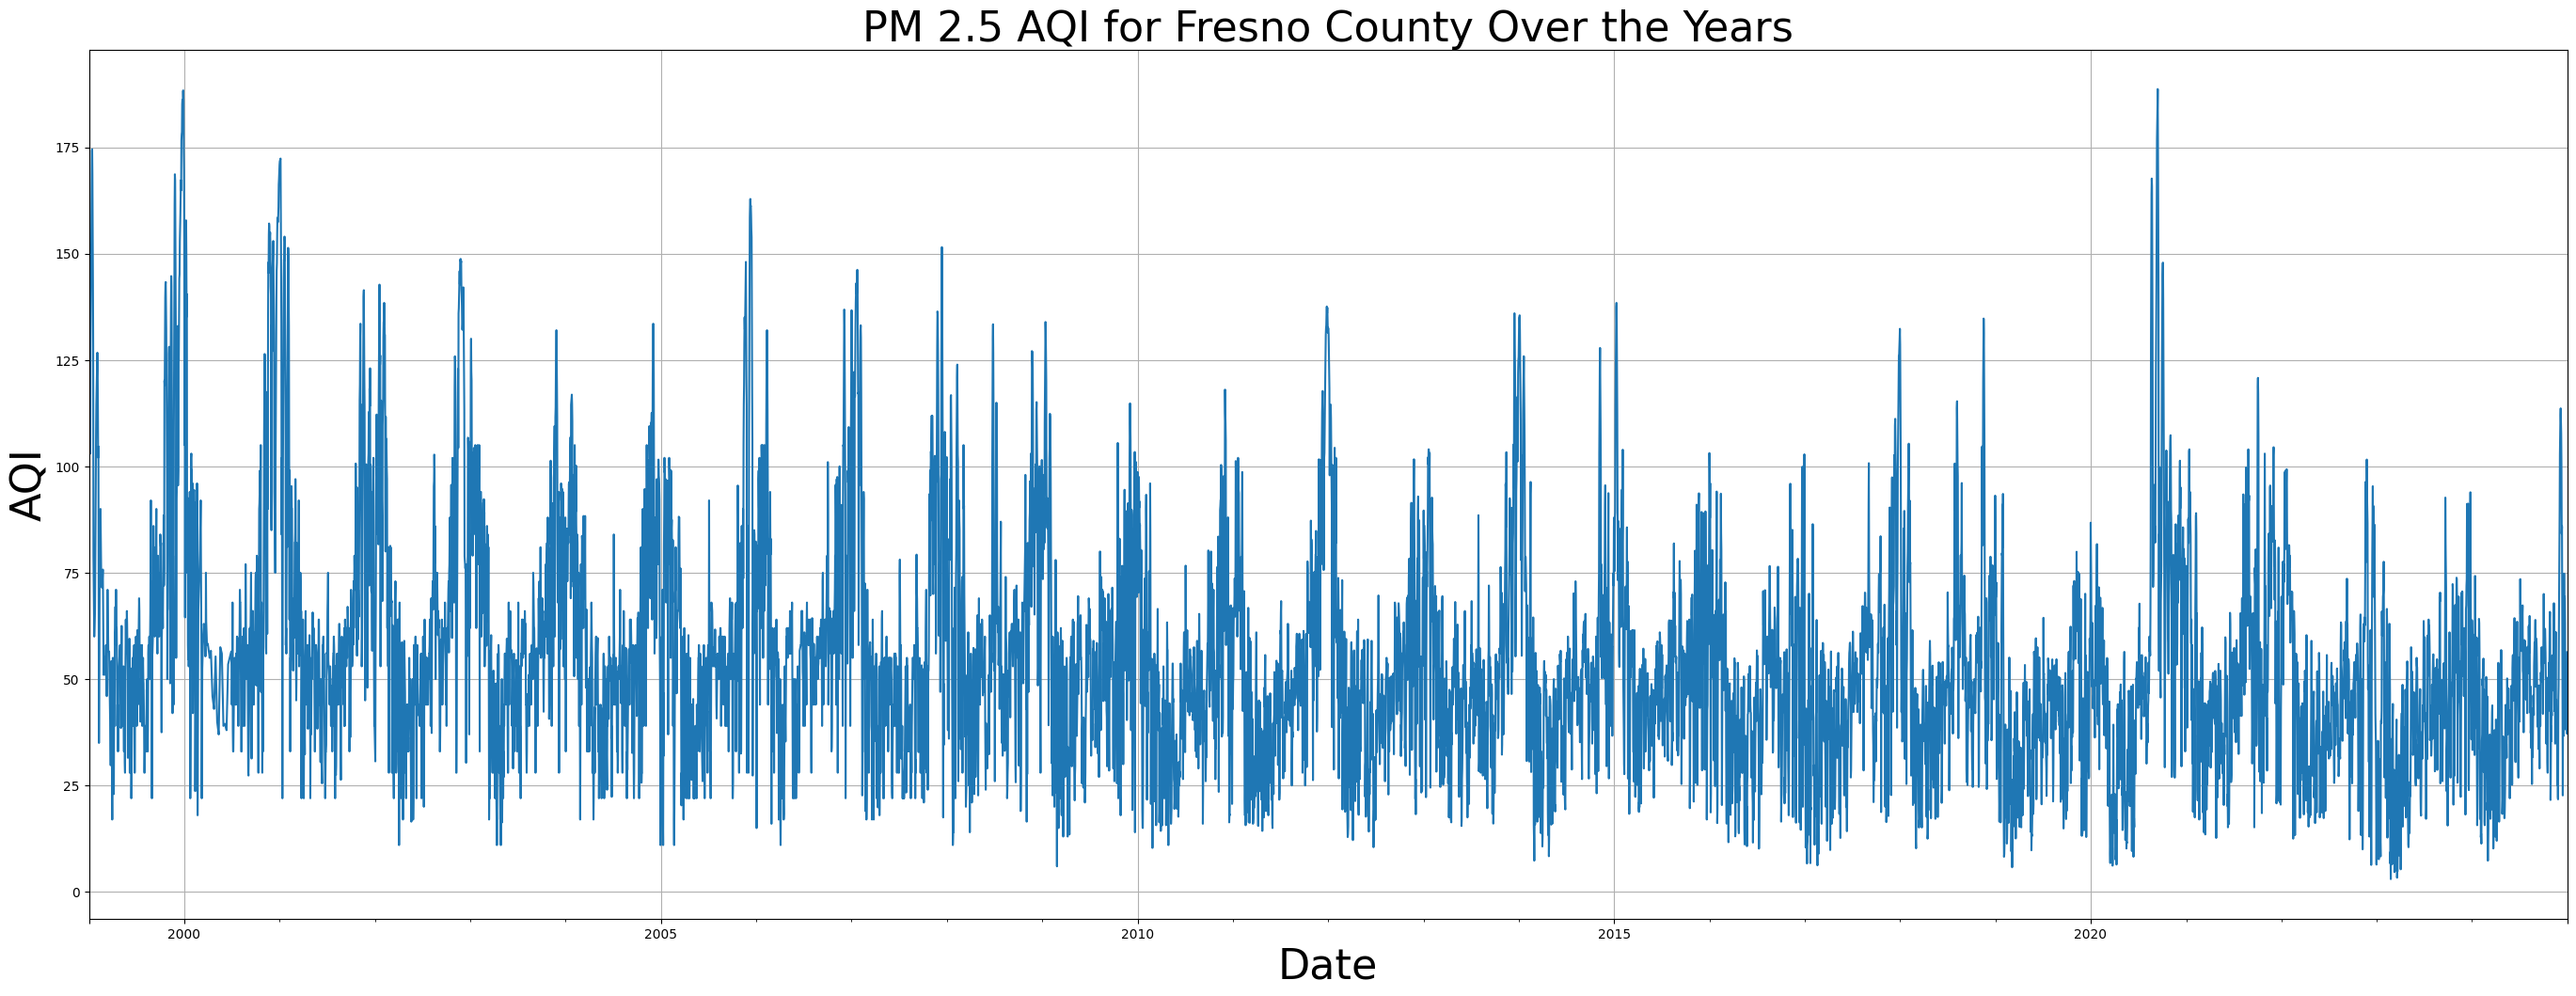

In [ ]:
# Plot
univariate_df['aqi_smoothed'].plot(figsize=(34, 12))
plt.title('PM 2.5 AQI for Fresno County Over the Years',fontsize=32)
plt.xlabel('Date', fontsize=32)
plt.ylabel('AQI', fontsize=32)
plt.grid(True)
plt.show()


In [ ]:
# Separating the year-month-day formatted column into year, month, and day columns
aqi_2_weeks = univariate_df.copy()

In [ ]:
aqi_2_weeks.reset_index(inplace=True)

In [ ]:
aqi_2_weeks['year'] = aqi_2_weeks['index'].dt.year
aqi_2_weeks['month'] = aqi_2_weeks['index'].dt.month
aqi_2_weeks['day'] = aqi_2_weeks['index'].dt.day

In [ ]:
aqi_2_weeks = aqi_2_weeks[
    (aqi_2_weeks["year"] == 2024) &
    (aqi_2_weeks["month"] == 1) &
    (aqi_2_weeks["day"] >= 1) &
    (aqi_2_weeks["day"] <= 14)
]

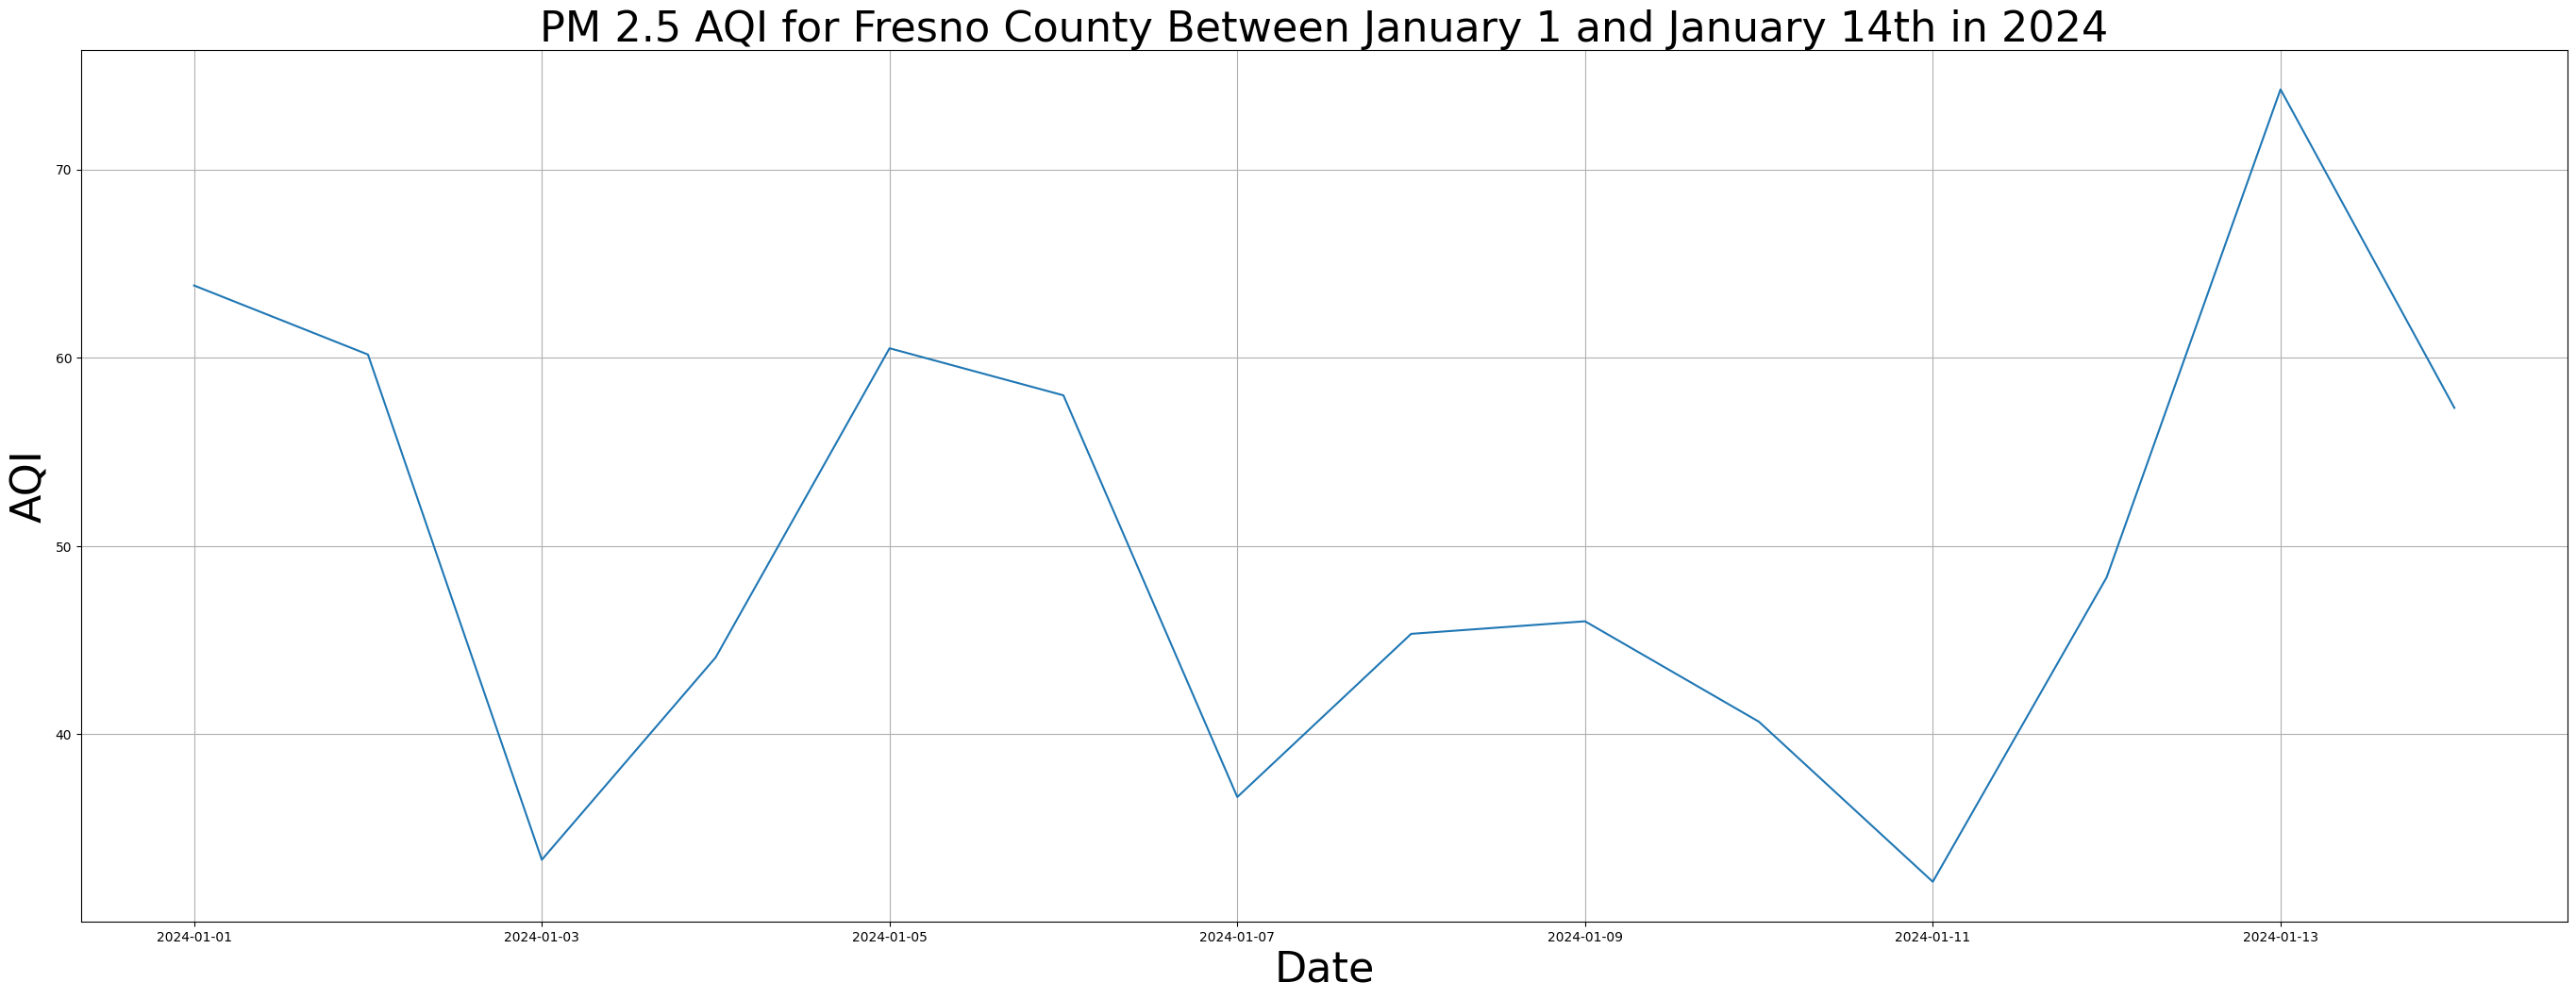

In [ ]:
plt.figure(figsize=(34, 12))
plt.plot(aqi_2_weeks['index'], aqi_2_weeks['aqi_smoothed'])
plt.title('PM 2.5 AQI for Fresno County Between January 1 and January 14th in 2024', fontsize=32)
plt.xlabel('Date', fontsize=32)
plt.ylabel('AQI', fontsize=32)
plt.grid(True)
plt.show()

In [ ]:
univariate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9497 entries, 1999-01-01 to 2024-12-31
Freq: D
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aqi           9497 non-null   float64
 1   aqi_smoothed  9497 non-null   float64
dtypes: float64(2)
memory usage: 222.6 KB


Step 7: Check if the data meets the assumptions for SARIMA

Step 7.1: Test stationarity using the ADF test

In [ ]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(univariate_df['aqi_smoothed'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.13750166938798
p-value: 2.9088661641092918e-15


Step 7.2: Test stationarity using the ACF plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

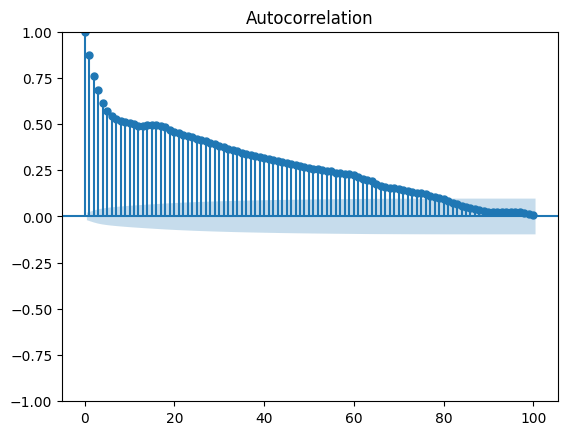

In [ ]:
plot_acf(univariate_df['aqi_smoothed'], lags=100)
plt.show()

Step 4: Normalize data as LSTM performs better with scaled values.

In [ ]:
# Convert scalar column to a 2D column (DataFrame)
aqi_smoothed_2d = pd.DataFrame(univariate_df['aqi_smoothed'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
aqi_data_scaled = scaler.fit_transform(aqi_smoothed_2d)

In [ ]:
aqi_data_scaled

array([[0.56577701],
       [0.56232086],
       [0.55837097],
       ...,
       [0.24821475],
       [0.18402902],
       [0.28726481]])

Step 5: Prepare the Training and Test Data

In [ ]:
import numpy as np

# Assigns the correct value for every 10 sequences of training data
# Use the last 10 days to predict the 11th day aqi
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])  # Past 'time_steps' values
        y.append(data[i + time_steps])      # Next day's AQI
    return np.array(X), np.array(y)

In [ ]:
# retrieve the Training and test data
X, y = create_sequences(aqi_data_scaled, 10)

In [ ]:
# Split into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Reshape input to fit LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 10, 1))
X_test = X_test.reshape((X_test.shape[0], 10, 1))


In [ ]:
X_train.shape

(7589, 10, 1)

In [ ]:
y_train.shape

(7589, 1)

Step 6: Train the LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 1)),  # First LSTM layer
    LSTM(50, return_sequences=False),  # Second LSTM layer
    Dense(25),  # Dense layer
    Dense(1)  # Output layer (predict AQI)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# set early stopping rules
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Stop after 10 epochs of no improvement
                               restore_best_weights=True,
                               verbose=1)
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,  # Maximum number of epochs
                    batch_size=32,
                    validation_data=(X_test, y_test),  # Validation data
                    callbacks=[early_stopping])  # Early stopping

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0149 - val_loss: 0.0074
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 9/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 10/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 11/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 12/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/ste

Step 7: Test the model

In [ ]:
import matplotlib.pyplot as plt

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


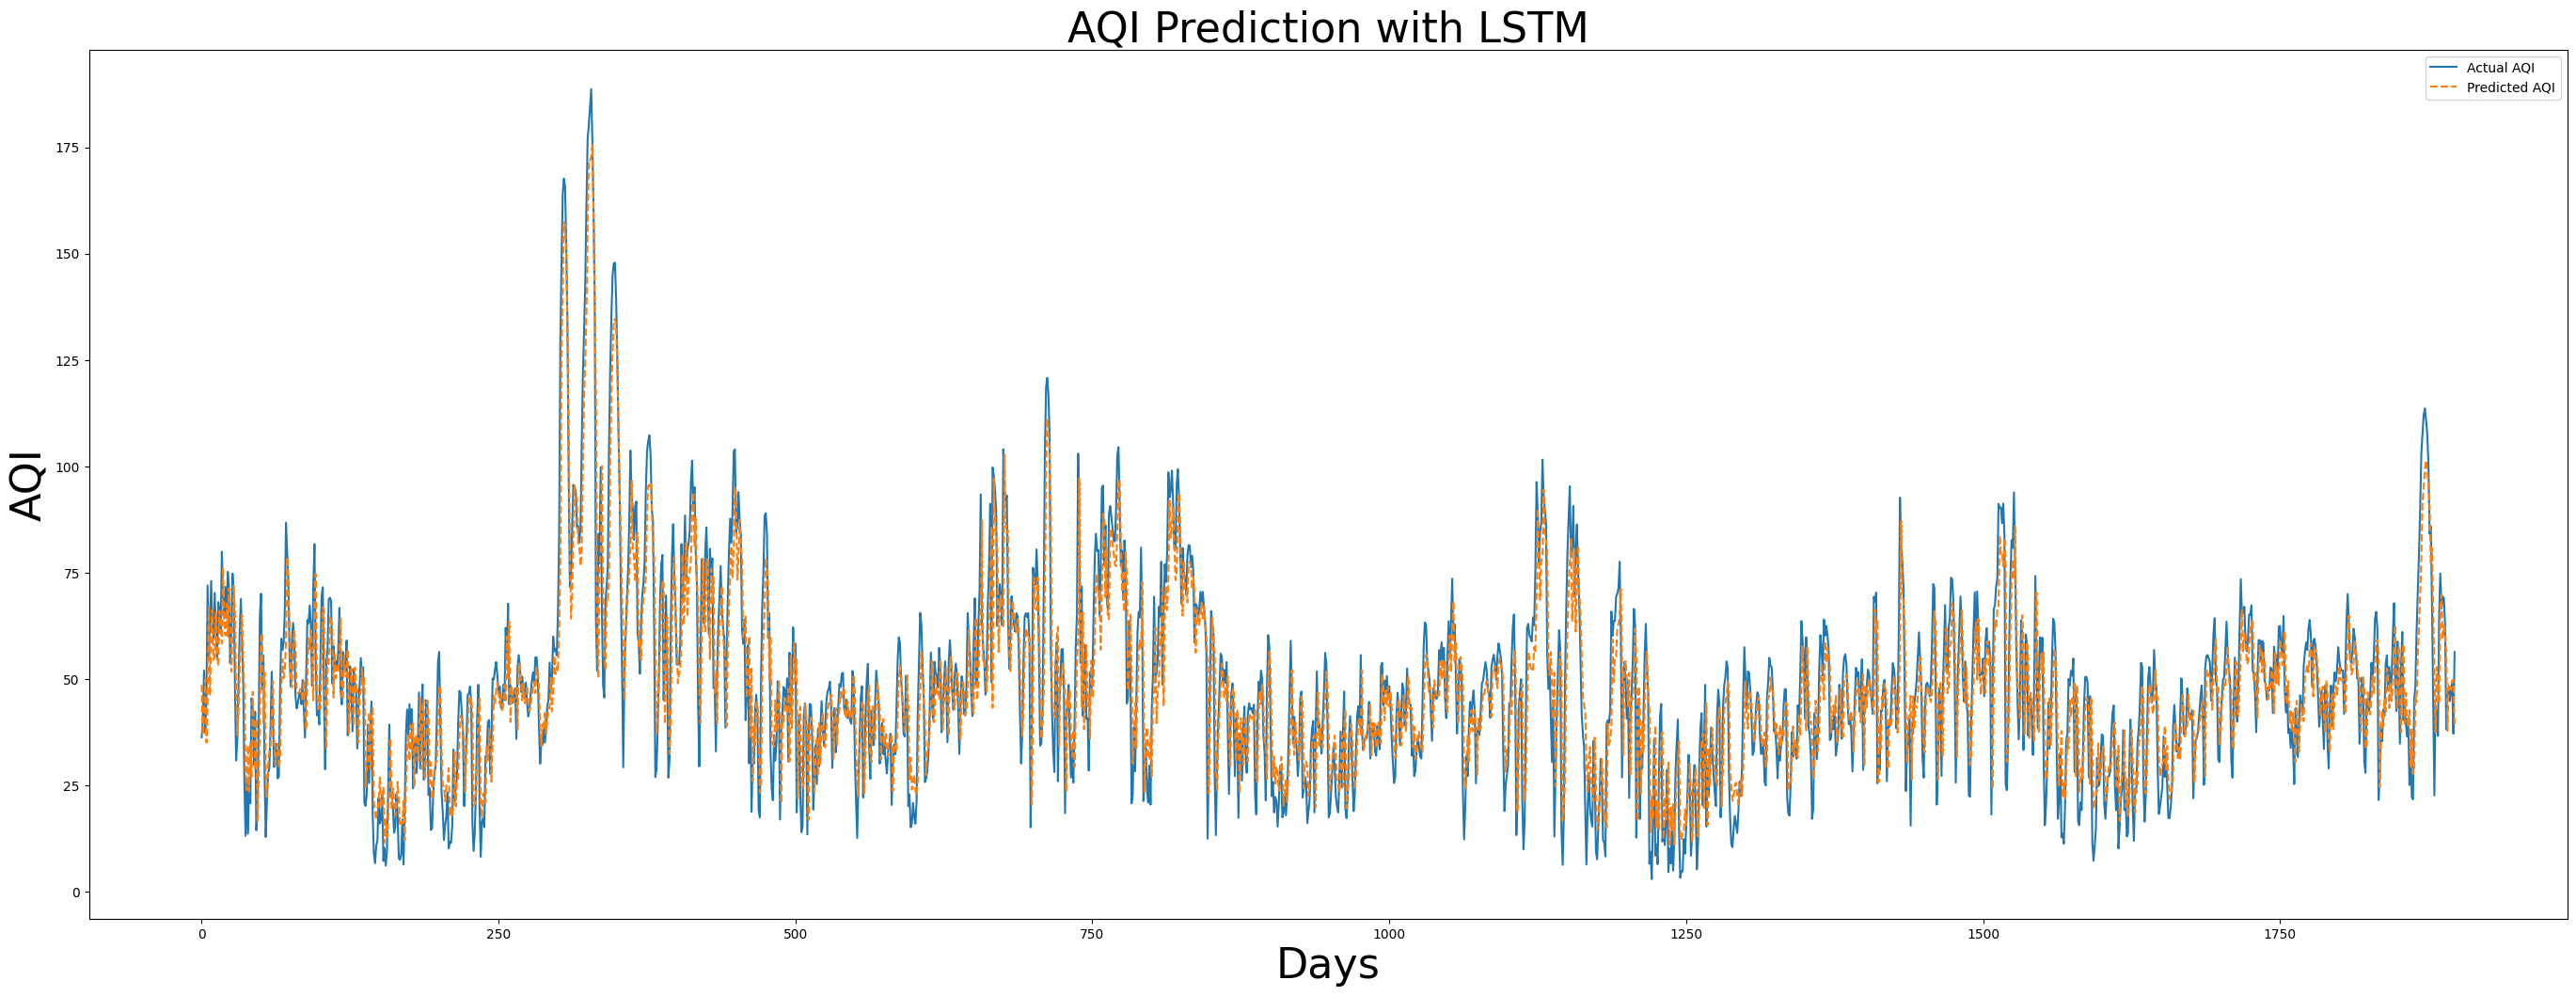

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Convert back to original AQI values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(34, 12))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle="dashed")
plt.legend()
plt.xlabel("Days", fontsize=32)
plt.ylabel("AQI", fontsize=32)
plt.title("AQI Prediction with LSTM", fontsize=32)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

MAE: 8.689849977127842
MSE: 131.00103892768365
RMSE: 11.445568527936201
R^2 Score: 0.7677389340398595


As the dashed line (predicted aqi) closely follows the solid line (actual aqi), the model performs very well and was able to capture the pattern.

Step 8 (Optional): Save the model

In [ ]:
model.save('lstm_model.h5')

In [ ]:
from google.colab import files

files.download('lstm_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Find out the most important factors for Ozone, PM2.5, PM10, and NO2 by training LSTM models for each and using SHAP. Need to merge meteorological data and perhaps the location of the monitors to do this.

2. Train models for each monitor location, and then do shap to find out if there are differences in importance of factors based on location and if yes then find out which locations are prone to what factors.

4. When training multivariate LSTM model, only include variables that have some relationship. Otherwise, including it will add unnecessary complexity to the LSTM model, reducing its performance (making it more noisy).

Steps for Feature Selection:
- Therefore, collect possible variable data.
- Correlation analysis: check for linear relationships with AQI, using pearson or scatter plots.
- Check for non-linear relationships with AQI using some methods.
- Feature importance methods: PCA, or Autoencoders.
- Ablation study - compare the performance of the LSTM model with and without the feature. For instance, if excluding elevation doesn't harm the performance or improves it, then elevation may not be contributing meaningful information.


5. To analyze the effectiveness of ISR Rules, first select and understand the ISR rules that have relevant datasets available. Testing the effectiveness of the ISR rule 9510 is not really possible, unless done in aggregate form because there does not exist datasets for constructions done. Therefore, aim at rules that have enough relevant datasets that allow high granular analysis.

Compare Areas Affected by ISR Rules vs Areas that do not implement such rules. The areas should be similar.

Remember that effectiveness of ISR rules can vary based on their specific design and focus. Mitigation-focused rules can be more effective at reducing emissions if they require inverstments in cleaner technologoies. Transportation-focused rules might focus on emissions from trucks, construction vehicles, or traffic-related emissions such as NOx and PM 2.5 levels.
Additionally, land-use and development rules such as the ISR 9510 rule focus on limiting or mitigating emissions from construction projects, reducing dust, particulate matter, or emissions from construction equipment.

Consider regression analysis, difference-in-differences, and time-series analysis methods.

Step 9: SHAP Analysis to Explain the Model (Done in Local Machine)

Step 10: Predict the Jan 2025 Daily AQIs of Fresno County Based on the Last 10 Days of 2024

In [ ]:
last_sequence = X_test[-1:]

In [ ]:
input_seq = last_sequence.copy()
predictions = []

for _ in range(30):
    next_pred = model.predict(input_seq)[0][0]  # scalar prediction
    predictions.append(next_pred)

    # Add predicted value and remove the oldest timestep
    next_input = np.append(input_seq[:, 1:, :], [[[next_pred]]], axis=1)
    input_seq = next_input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━

In [ ]:
scaled_preds = np.array(predictions).reshape(-1, 1)  # shape (30, 1)

real_preds = scaler.inverse_transform(scaled_preds)


In [ ]:
real_preds

array([[41.291912],
       [46.083706],
       [48.592278],
       [49.871876],
       [50.8947  ],
       [51.698265],
       [52.332546],
       [52.939606],
       [53.527653],
       [54.107765],
       [54.91757 ],
       [55.845665],
       [56.74991 ],
       [57.584896],
       [58.356274],
       [59.07823 ],
       [59.765686],
       [60.43243 ],
       [61.088066],
       [61.73829 ],
       [62.38573 ],
       [63.02676 ],
       [63.655556],
       [64.26822 ],
       [64.86357 ],
       [65.442215],
       [66.005585],
       [66.55521 ],
       [67.09231 ],
       [67.61766 ]], dtype=float32)

Step 8: Kriging Model

Step 8.1: Prepare the format of the data for Kriging Model and for Testing assumptions

In [ ]:
# prepare the main aqi data
krig_df = df.groupby(['date_local', 'site_number'])['aqi'].mean().reset_index()

In [ ]:
# extract each unique monitor locations (latitude and longitude)
site_locations = df[["site_number", "latitude", "longitude"]].drop_duplicates()

In [ ]:
# Merge the site locations (latitude and longitude)
krig_df = krig_df.merge(site_locations, on="site_number", how="left")

In [ ]:
krig_df

,date_local,site_number,aqi,latitude,longitude
0,1999-01-03,8,119.0,36.781333,-119.773190
1,1999-01-03,5001,98.0,36.819449,-119.716433
2,1999-01-06,8,115.0,36.781333,-119.773190
3,1999-01-06,5001,91.0,36.819449,-119.716433
4,1999-01-09,8,159.0,36.781333,-119.773190
...,...,...,...,...,...
29319,2024-12-31,500,18.0,36.985119,-119.658339
29320,2024-12-31,2009,3.0,36.634225,-120.382331
29321,2024-12-31,2016,85.0,36.710833,-119.777500
29322,2024-12-31,5001,62.0,36.819449,-119.716433


In [ ]:
# Select a random single day
pm25_7_4_18 = krig_df[krig_df['date_local'] == '2021-03-04']


In [ ]:
pm25_7_4_18

,date_local,site_number,aqi,latitude,longitude
21051,2021-03-04,11,55.0,36.785380,-119.773210
21052,2021-03-04,500,52.0,36.985119,-119.658339
21053,2021-03-04,2009,48.0,36.634225,-120.382331
21054,2021-03-04,2016,60.0,36.710833,-119.777500
21055,2021-03-04,5001,59.0,36.819449,-119.716433
21056,2021-03-04,5025,51.0,36.726390,-119.733000


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a geometry column
pm25_7_4_18['geometry'] = pm25_7_4_18.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(pm25_7_4_18, geometry='geometry')

<ipython-input-339-5e1a05236eb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_7_4_18['geometry'] = pm25_7_4_18.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [ ]:
# Create a distance-based spatial weights matrix (threshold in degrees)
w = DistanceBand.from_dataframe(gdf, threshold=4.5)

In [ ]:
# threshold is enough
print(w.neighbors)

{21051: [21052, 21053, 21054, 21055, 21056], 21052: [21051, 21053, 21054, 21055, 21056], 21053: [21051, 21052, 21054, 21055, 21056], 21054: [21051, 21052, 21053, 21055, 21056], 21055: [21051, 21052, 21053, 21054, 21056], 21056: [21051, 21052, 21053, 21054, 21055]}


Moran's Test

In [ ]:
!pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
from esda.moran import Moran

moran = Moran(gdf['aqi'], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

Moran's I: -0.20000000000000004, p-value: 0.013


/usr/local/lib/python3.11/dist-packages/esda/moran.py:192: RuntimeWarning: divide by zero encountered in scalar divide
  self.z_norm = (self.I - self.EI) / self.seI_norm


Variogram To Test for Spatial Autocorrelation

In [ ]:
df_filtered = krig_df[krig_df['date_local'] == '2024-06-01']  # or use .between for a range


In [ ]:
coords = df_filtered[['longitude', 'latitude']].values
values = df_filtered['aqi'].values

In [ ]:
# Create the variogram
V = Variogram(coords, values)

# Plot it
V.plot()
plt.title('Empirical Variogram of AQI')
plt.show()

Check the PM 2.5 Monitor Distribution Across Fresno County

New Finding: It turns out that Kriging is a spatial model. But the AQI data features both space and time. Thus, need to consider **spatio temporal modeling**. However, Kriging can be turned into a spatio-temporal model.